In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import seaborn as sns
import pickle

from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
from scipy.stats import binned_statistic_2d

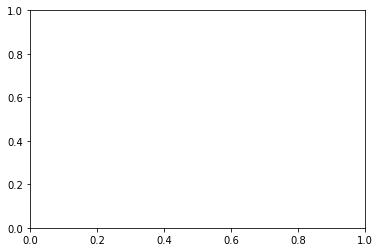

In [3]:
from oceantracker.post_processing.read_output_files import load_output_files 
from oceantracker.post_processing.plotting import stats_plot

## v17

### retention success

In [5]:
surviving

array([[ 1215,  1362,   933,   537,   396,   267,   261,   114,   120,
           60,    57],
       [ 2130,  1779,  1239,  1116,   795,   600,   606,   246,   228,
          165,   171],
       [ 1974,  1551,  1554,  1113,   930,   600,   405,   384,   348,
          276,   252],
       [ 1770,  1497,  1557,  1371,  1218,   867,   774,   609,   543,
          486,   525],
       [ 4998,  3651,  3456,  2895,  2574,  2358,  2142,  2226,  1725,
         1515,  1509],
       [ 1467,  1368,  1206,  1209,  1242,  1062,  1140,  1080,   999,
          915,   996],
       [ 6534,  6078,  4509,  2694,  2298,  1794,  1395,  1077,   825,
          678,   612],
       [ 7113,  5553,  3909,  3159,  2412,  2163,  1731,  1197,   930,
          810,   627],
       [ 8880,  7083,  4947,  4251,  3198,  2670,  2109,  1662,  1323,
         1206,   927],
       [ 9879,  7539,  6264,  4914,  3723,  3459,  2640,  2124,  1899,
         1404,  1089],
       [10491,  7329,  6783,  5343,  4251,  3402,  2625,  20

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


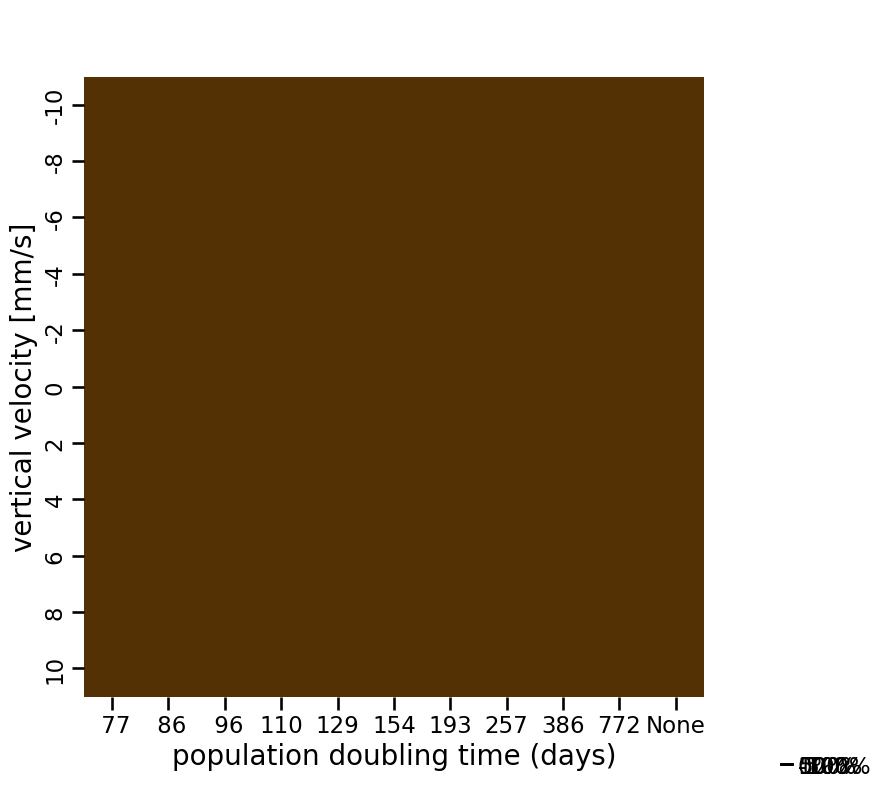

In [6]:
path = '/scratch/local1/output/retention_success_sa_mono.pkl'
with open(path, 'rb') as f:
    retention_success_sa = pickle.load(f)
    surviving, threshold, split_frac, vert_vel = retention_success_sa[0], retention_success_sa[1], retention_success_sa[2], retention_success_sa[3]


# Define your minimum and maximum based on your threshold
vmin = threshold - threshold 
vmax = threshold + threshold 

# Normalize the colormap
norm = TwoSlopeNorm(vmin=vmin, vcenter=threshold, vmax=vmax)

xtickslabels = []
for item in split_frac:
    if item != 0:
        xtickslabels.append('{:3.0f}'.format((1 / item) * (1 / 1440)) )
    else:
        xtickslabels.append('None')
      
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
heatmap = sns.heatmap(surviving*0,
                cmap='BrBG',
                norm=norm,
                xticklabels=xtickslabels,
                yticklabels=[int(item*1e3) for item in vert_vel],
                square=True
                )

# set xy labels
ax.set_xlabel('population doubling time (days)', fontsize=20)
ax.set_ylabel('vertical velocity [mm/s]', fontsize=20)


# Get the colorbar from the Heatmap
cbar = heatmap.collections[0].colorbar

# Get the original colorbar labels
original_labels = cbar.get_ticks()
new_labels = np.arange(vmin, vmax+threshold/2., threshold/2.)
cbar.set_ticks(new_labels)

# Calculate the new labels as percentages of the threshold
new_labels = [(label - threshold) / threshold * 100 for label in new_labels]
new_labels = ['{:.0f}%'.format(label) for label in new_labels]

# Set the new labels
# cbar.set_ticks(new_labels)
cbar.set_ticklabels(new_labels)

# Set the colorbar title
cbar.set_label('population change', rotation=270, labelpad=20, fontsize=20)

plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


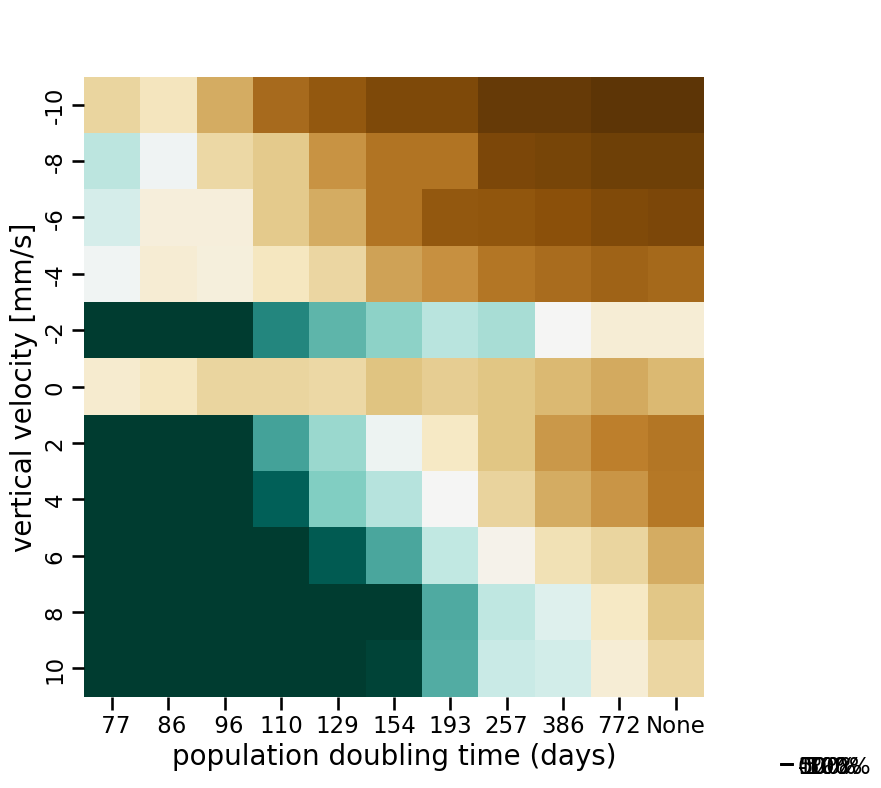

In [4]:
path = '/scratch/local1/output/retention_success_sa_mono.pkl'
with open(path, 'rb') as f:
    retention_success_sa = pickle.load(f)
    surviving, threshold, split_frac, vert_vel = retention_success_sa[0], retention_success_sa[1], retention_success_sa[2], retention_success_sa[3]


# Define your minimum and maximum based on your threshold
vmin = threshold - threshold 
vmax = threshold + threshold 

# Normalize the colormap
norm = TwoSlopeNorm(vmin=vmin, vcenter=threshold, vmax=vmax)

xtickslabels = []
for item in split_frac:
    if item != 0:
        xtickslabels.append('{:3.0f}'.format((1 / item) * (1 / 1440)) )
    else:
        xtickslabels.append('None')
      
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
heatmap = sns.heatmap(surviving,
                cmap='BrBG',
                norm=norm,
                xticklabels=xtickslabels,
                yticklabels=[int(item*1e3) for item in vert_vel],
                square=True
                )

# set xy labels
ax.set_xlabel('population doubling time (days)', fontsize=20)
ax.set_ylabel('vertical velocity [mm/s]', fontsize=20)


# Get the colorbar from the Heatmap
cbar = heatmap.collections[0].colorbar

# Get the original colorbar labels
original_labels = cbar.get_ticks()
new_labels = np.arange(vmin, vmax+threshold/2., threshold/2.)
cbar.set_ticks(new_labels)

# Calculate the new labels as percentages of the threshold
new_labels = [(label - threshold) / threshold * 100 for label in new_labels]
new_labels = ['{:.0f}%'.format(label) for label in new_labels]

# Set the new labels
# cbar.set_ticks(new_labels)
cbar.set_ticklabels(new_labels)

# Set the colorbar title
cbar.set_label('population change', rotation=270, labelpad=20, fontsize=20)

plt.show()


In [ ]:
## v16

### retention success

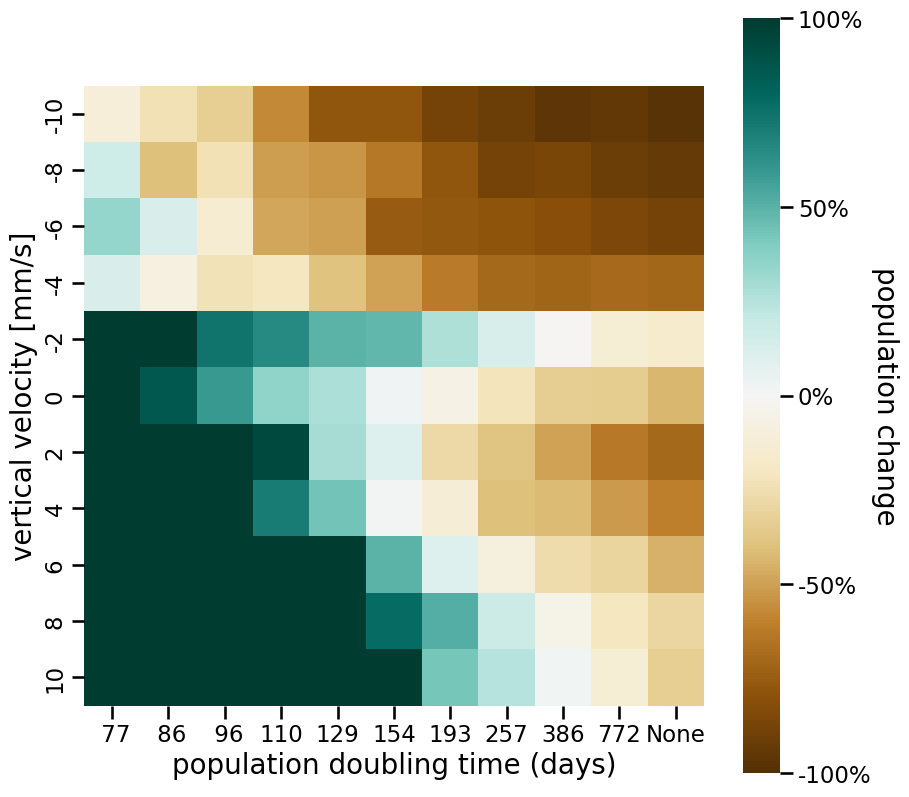

In [7]:
path = '/scratch/local1/output/22_12_08_retention_v16/retention_success_sa_mono.pkl'
with open(path, 'rb') as f:
    retention_success_sa = pickle.load(f)
    surviving, threshold, split_frac, vert_vel = retention_success_sa[0], retention_success_sa[1], retention_success_sa[2], retention_success_sa[3]


# Define your minimum and maximum based on your threshold
vmin = threshold - threshold 
vmax = threshold + threshold 

# Normalize the colormap
norm = TwoSlopeNorm(vmin=vmin, vcenter=threshold, vmax=vmax)

xtickslabels = []
for item in split_frac:
    if item != 0:
        xtickslabels.append('{:3.0f}'.format((1 / item) * (1 / 1440)) )
    else:
        xtickslabels.append('None')
      
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
heatmap = sns.heatmap(surviving,
                cmap='BrBG',
                norm=norm,
                xticklabels=xtickslabels,
                yticklabels=[int(item*1e3) for item in vert_vel],
                square=True
                )

# set xy labels
ax.set_xlabel('population doubling time (days)', fontsize=20)
ax.set_ylabel('vertical velocity [mm/s]', fontsize=20)


# Get the colorbar from the Heatmap
cbar = heatmap.collections[0].colorbar

# Get the original colorbar labels
original_labels = cbar.get_ticks()
new_labels = np.arange(vmin, vmax+threshold/2., threshold/2.)
cbar.set_ticks(new_labels)

# Calculate the new labels as percentages of the threshold
new_labels = [(label - threshold) / threshold * 100 for label in new_labels]
new_labels = ['{:.0f}%'.format(label) for label in new_labels]

# Set the new labels
# cbar.set_ticks(new_labels)
cbar.set_ticklabels(new_labels)

# Set the colorbar title
cbar.set_label('population change', rotation=270, labelpad=20, fontsize=20)

plt.show()


## v15

## particle counts over time in statistical polygons

In [5]:
dust_stats = load_output_files.load_stats_file('/scratch/local1/output/22_12_08_retention_v15/22_12_08_retention_v15_C001_caseInfo.json')

Warning reading stats file /scratch/local1/output/22_12_08_retention_v15/22_12_08_retention_v15_C001_stats_polygon_time_001.nc, cannot load variablex, is not in file 
Warning reading stats file /scratch/local1/output/22_12_08_retention_v15/22_12_08_retention_v15_C001_stats_polygon_time_001.nc, cannot load variabley, is not in file 


In [6]:
dust_stats.keys()

dict_keys(['total_num_particles_released', 'limits', 'time_var', 'stats_type', 'count', 'time', 'info', 'release_group_centered_grids', 'polygon_list', 'particle_status_flags', 'particle_release_group_info', 'full_params', 'grid'])

In [7]:
time = dust_stats['time']
# transform time to datetime
time = pd.to_datetime(time, unit='s')

count = dust_stats['count'][:,0,:]

poli = dust_stats['polygon_list']
poli = [item['user_polygon_name'] for item in poli]
# Capitalize first letter and replace _ with space
poli = [item[0].upper() + item[1:].replace('_', ' ') for item in poli]

# make a pandas dataframe out of it
df = pd.DataFrame(count, index=time, columns=poli)

# slice the dataframe to only one row per hour
df = df.resample('H').mean()

df

,Geesthacht,Neuengamme,Kirchwerder,Wilhelmsburg,Harbor,Schulau,Stade,Glückstadt,Freiburg,Brunsbüttel,Ottendorf,Cuxhafen,North sea
2012-01-01 01:00:00,5000.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2012-01-01 02:00:00,5000.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2012-01-01 03:00:00,5000.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2012-01-01 04:00:00,5000.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2012-01-01 05:00:00,5000.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-30 20:00:00,0.0,0.0,0.0,0.0,0.0,261.000000,27.0,37.000000,1.0,0.0,0.0,0.0,0.0
2012-12-30 21:00:00,0.0,0.0,0.0,0.0,0.0,261.000000,27.0,37.000000,1.0,0.0,0.0,0.0,0.0
2012-12-30 22:00:00,0.0,0.0,0.0,0.0,0.0,260.033333,27.7,37.266667,1.0,0.0,0.0,0.0,0.0
2012-12-30 23:00:00,0.0,0.0,0.0,0.0,0.0,260.000000,27.0,38.000000,1.0,0.0,0.0,0.0,0.0


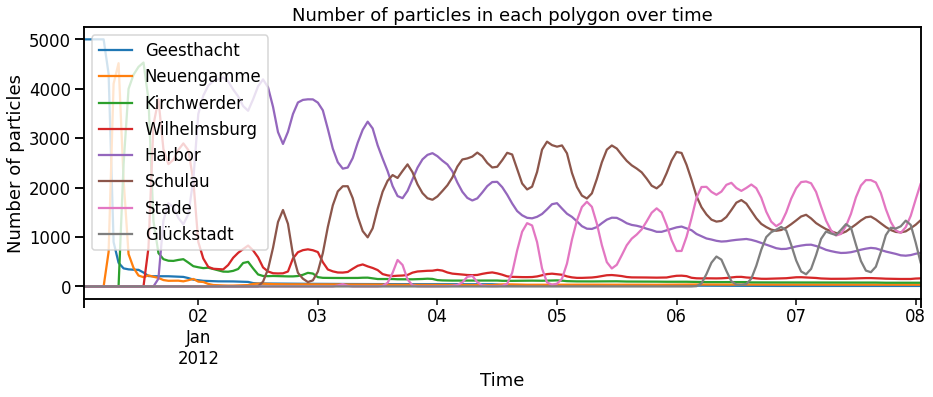

In [8]:
# plot
# plot each column as a line on the same plot over time
fig, ax = plt.subplots(figsize=(15, 5))
df.iloc[:,0:8].plot(ax=ax)

# plot sum of all columns as a line on the same plot over time
# df.sum(axis=1).plot(ax=ax, color='black', linewidth=3)

ax.set_ylabel('Number of particles')
ax.set_xlabel('Time')
ax.set_title('Number of particles in each polygon over time')

# set xlim to only show the first 7 days
ax.set_xlim([df.index[0], df.index[0] + pd.Timedelta(days=7)])



plt.show()

In [9]:
tracks = load_output_files.load_particle_track_vars('/scratch/local1/output/22_12_08_retention_v15/22_12_08_retention_v15_C001_caseInfo.json', var_list=['x','time','status'])

In [10]:
tracks.keys()

dict_keys(['dimensions', 'total_num_particles_released', 'status', 'x0', 'IDpulse', 'x', 'time', 'IDrelease_group', 'dry_cell_index', 'z', 'grid', 'particle_status_flags', 'particle_release_group_info', 'full_params', 'axis_lim'])

(368161.0, 368833.0)

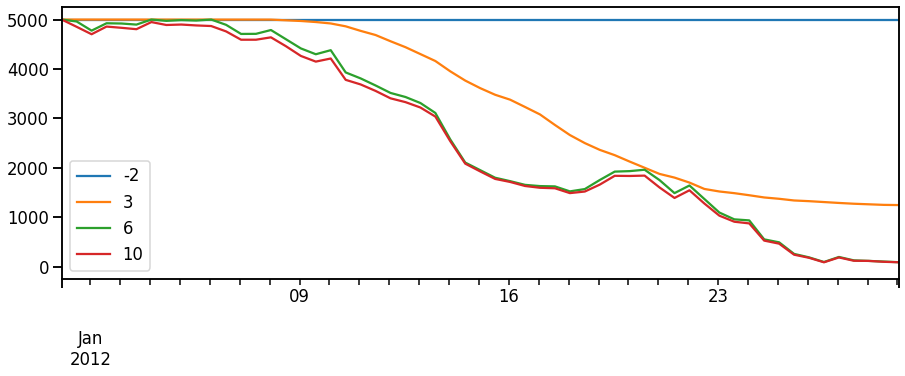

In [11]:
time = tracks['time']
status = tracks['status']
# get set of unique status values
status_values = np.unique(status)
# for each time step count the number of particles with a status greater or equal than 0
count = np.array([np.sum(status >= i, axis=1) for i in status_values])

#turn into a pandas dataframe
df = pd.DataFrame(count.T, index=time, columns=status_values)
# time as a datetime
df.index = pd.to_datetime(df.index, unit='s')

# plot
fig, ax = plt.subplots(figsize=(15, 5))
df.plot(ax=ax)
# the first 28 days
plt.xlim([df.index[0], df.index[0] + pd.Timedelta(days=28)])

### retention success

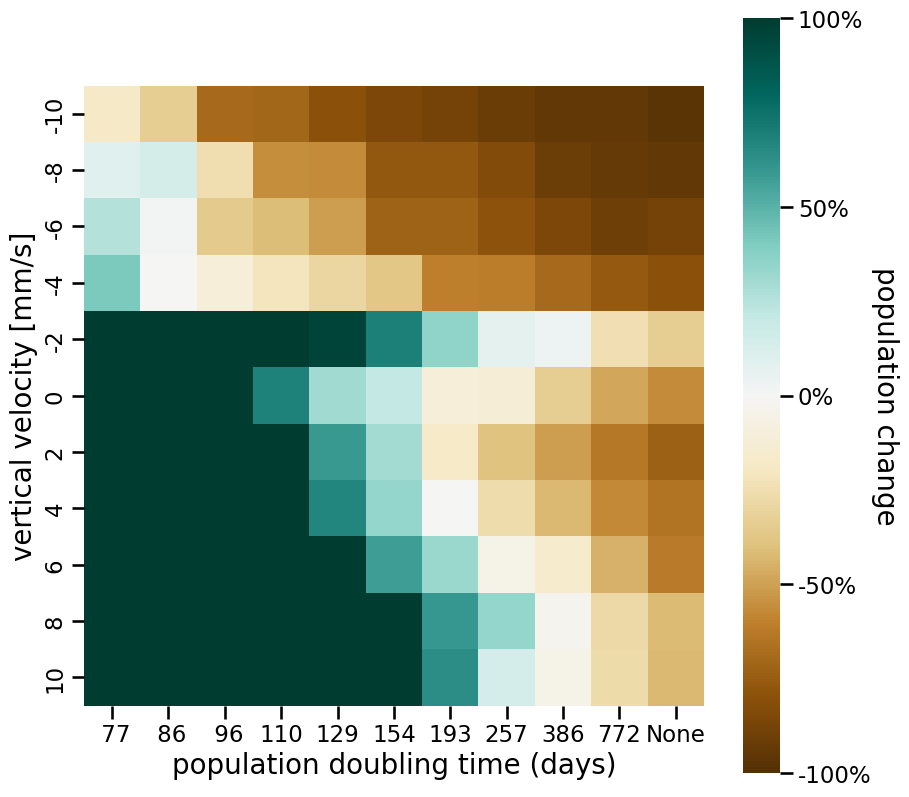

In [13]:
path = '/scratch/local1/output/22_12_08_retention_v15/retention_success_sa_mono.pkl'
with open(path, 'rb') as f:
    retention_success_sa = pickle.load(f)
    surviving, threshold, split_frac, vert_vel = retention_success_sa[0], retention_success_sa[1], retention_success_sa[2], retention_success_sa[3]


# Define your minimum and maximum based on your threshold
vmin = threshold - threshold 
vmax = threshold + threshold 

# Normalize the colormap
norm = TwoSlopeNorm(vmin=vmin, vcenter=threshold, vmax=vmax)

xtickslabels = []
for item in split_frac:
    if item != 0:
        xtickslabels.append('{:3.0f}'.format((1 / item) * (1 / 1440)) )
    else:
        xtickslabels.append('None')
      
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
heatmap = sns.heatmap(surviving,
                cmap='BrBG',
                norm=norm,
                xticklabels=xtickslabels,
                yticklabels=[int(item*1e3) for item in vert_vel],
                square=True
                )

# set xy labels
ax.set_xlabel('population doubling time (days)', fontsize=20)
ax.set_ylabel('vertical velocity [mm/s]', fontsize=20)


# Get the colorbar from the Heatmap
cbar = heatmap.collections[0].colorbar

# Get the original colorbar labels
original_labels = cbar.get_ticks()
new_labels = np.arange(vmin, vmax+threshold/2., threshold/2.)
cbar.set_ticks(new_labels)

# Calculate the new labels as percentages of the threshold
new_labels = [(label - threshold) / threshold * 100 for label in new_labels]
new_labels = ['{:.0f}%'.format(label) for label in new_labels]

# Set the new labels
# cbar.set_ticks(new_labels)
cbar.set_ticklabels(new_labels)

# Set the colorbar title
cbar.set_label('population change', rotation=270, labelpad=20, fontsize=20)

plt.show()


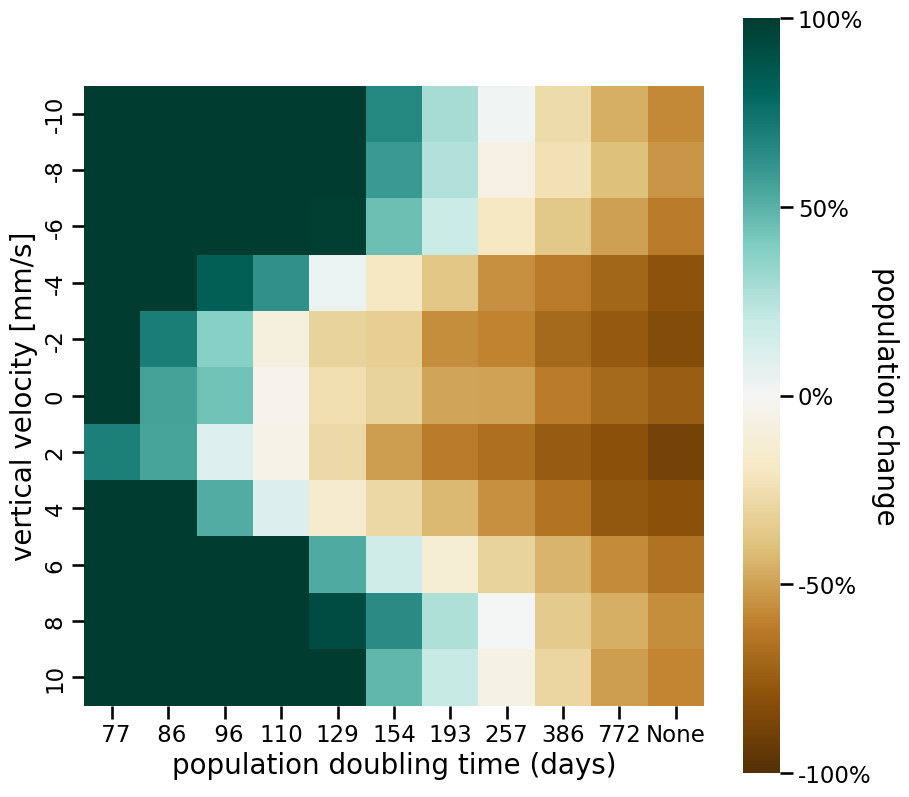

In [14]:
path = '/scratch/local1/output/22_12_08_retention_v15/retention_success_sa_diel.pkl'
with open(path, 'rb') as f:
    retention_success_sa = pickle.load(f)
    surviving, threshold, split_frac, vert_vel = retention_success_sa[0], retention_success_sa[1], retention_success_sa[2], retention_success_sa[3]


# Define your minimum and maximum based on your threshold
vmin = threshold - threshold 
vmax = threshold + threshold 

# Normalize the colormap
norm = TwoSlopeNorm(vmin=vmin, vcenter=threshold, vmax=vmax)

xtickslabels = []
for item in split_frac:
    if item != 0:
        xtickslabels.append('{:3.0f}'.format((1 / item) * (1 / 1440)) )
    else:
        xtickslabels.append('None')
      
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
heatmap = sns.heatmap(surviving,
                cmap='BrBG',
                norm=norm,
                xticklabels=xtickslabels,
                yticklabels=[int(item*1e3) for item in vert_vel],
                square=True
                )

# set xy labels
ax.set_xlabel('population doubling time (days)', fontsize=20)
ax.set_ylabel('vertical velocity [mm/s]', fontsize=20)


# Get the colorbar from the Heatmap
cbar = heatmap.collections[0].colorbar

# Get the original colorbar labels
original_labels = cbar.get_ticks()
new_labels = np.arange(vmin, vmax+threshold/2., threshold/2.)
cbar.set_ticks(new_labels)

# Calculate the new labels as percentages of the threshold
new_labels = [(label - threshold) / threshold * 100 for label in new_labels]
new_labels = ['{:.0f}%'.format(label) for label in new_labels]

# Set the new labels
# cbar.set_ticks(new_labels)
cbar.set_ticklabels(new_labels)

# Set the colorbar title
cbar.set_label('population change', rotation=270, labelpad=20, fontsize=20)

# plt.tight_layout()
plt.show()


In [16]:
path = '/scratch/local1/output/22_12_08_retention_v15/dbf.pkl'
with open(path, 'rb') as f:
    dbf = pickle.load(f)
    short,long = dbf[0], dbf[1]

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/local1/output/22_12_08_retention_v15/dbf.pkl'

NameError: name 'short' is not defined

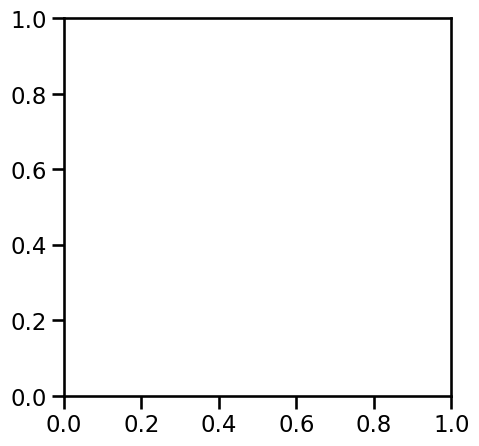

In [17]:
fig,ax = plt.subplots(figsize=(5,5),dpi=100)

# ax.set_title('Plankton depth below surface')
ax.boxplot(short,positions=[1],labels=['short\nliving'],
                #whis=(0,100)
                showfliers=False
                )
ax.boxplot(long,positions=[2],labels=['long\nliving'],
                #whis=(0,100)
                showfliers=False
                )
ax.set_ylabel('depth (m)')

In [18]:
tracks = load_output_files.load_particle_track_vars('/scratch/local1/output/22_12_08_retention_v15/22_12_08_retention_v15_C115_caseInfo.json', var_list=['age'])

In [19]:
x = tracks['x'][:,:,0].flatten()
# drop all nan values
x = x[~np.isnan(x)]

# same for y
y = tracks['x'][:,:,1].flatten()
y = y[~np.isnan(y)]

# same for age
age = tracks['age'].flatten()
age = age[~np.isnan(age)]
# transform age from seconds to days
age = age / (60*60*24)

# slite down to only 10000 particles
x = x[::10]
y = y[::10]
age = age[::10]


In [22]:

# Define the number of bins
num_bins = 100

# Create a 2D histogram with hexagonal bins
cmap = cm.get_cmap('viridis',36)  # choose the colormap you want to use

# Calculate the bin number and bin average age using binned_statistic_2d
binnumber, xedges, yedges, binnumbers = binned_statistic_2d(x, y, age, 'mean', bins=[num_bins,num_bins])


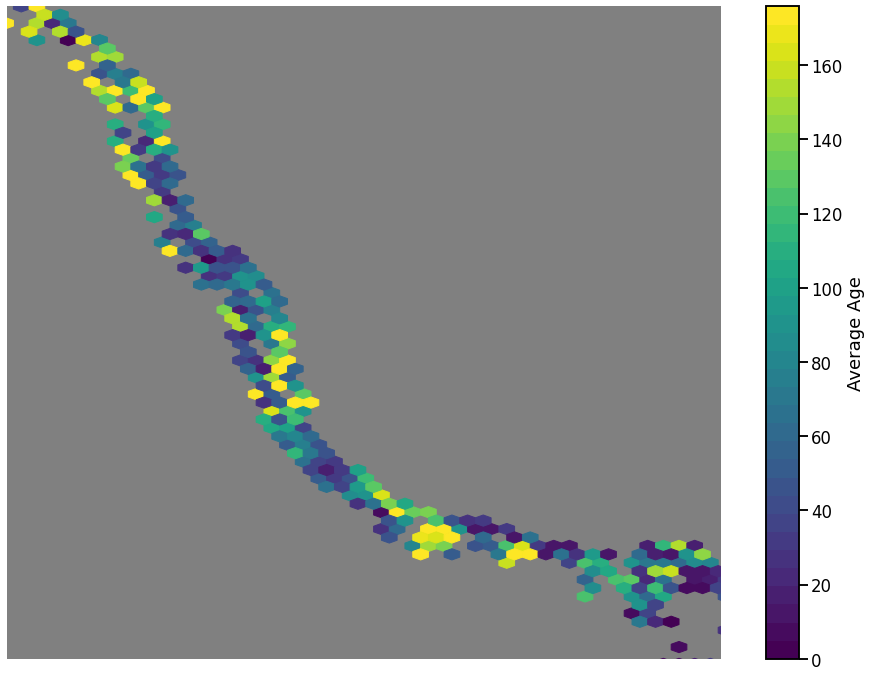

In [23]:
p90 = np.percentile(binnumber[np.isfinite(binnumber)], 95)

fig,ax = plt.subplots(figsize=(16,12))
# fig.set_facecolor('lightgreen')
ax.set_facecolor('gray')


# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove axis labels and ticks
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

hb = ax.hexbin(x, y, C=age, reduce_C_function=np.mean, gridsize=num_bins, cmap=cmap, vmin=0, vmax=p90)
cb = fig.colorbar(hb, ax=ax, label='Average Age')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_title('Hexbin plot colored by average age')

ax.set_xlim([5.15e5, 5.69e5])
ax.set_ylim([5.926e6, 5.97e6])

ax.set_xticks([])
ax.set_yticks([])

plt.show()

## v13

### particle counts over time in statistical polygons

In [49]:
dust_stats = load_output_files.load_stats_file('/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C002_caseInfo.json')

Warning reading stats file /scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C002_stats_polygon_time_001.nc, cannot load variablex, is not in file 
Warning reading stats file /scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C002_stats_polygon_time_001.nc, cannot load variabley, is not in file 


In [50]:
dust_stats.keys()

dict_keys(['total_num_particles_released', 'limits', 'time_var', 'stats_type', 'count', 'time', 'info', 'release_group_centered_grids', 'polygon_list', 'particle_status_flags', 'particle_release_group_info', 'full_params', 'grid'])

In [51]:
time = dust_stats['time']
# transform time to datetime
time = pd.to_datetime(time, unit='s')

count = dust_stats['count'][:,0,:]

poli = dust_stats['polygon_list']
poli = [item['user_polygon_name'] for item in poli]
# Capitalize first letter and replace _ with space
poli = [item[0].upper() + item[1:].replace('_', ' ') for item in poli]

# make a pandas dataframe out of it
df = pd.DataFrame(count, index=time, columns=poli)

# slice the dataframe to only one row per hour
df = df.resample('H').mean()

df

,Geesthacht,Neuengamme,Kirchwerder,Wilhelmsburg,Harbor,Schulau,Stade,Glückstadt,Freiburg,Brunsbüttel,Ottendorf,Cuxhafen,North sea
2012-01-01 01:00:00,4994.983333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-01 02:00:00,4992.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-01 03:00:00,4987.716667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-01 04:00:00,4977.366667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-01 05:00:00,4970.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-30 20:00:00,0.000000,0.0,0.0,0.0,0.0,135.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0
2012-12-30 21:00:00,0.000000,0.0,0.0,0.0,0.0,135.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0
2012-12-30 22:00:00,0.000000,0.0,0.0,0.0,0.0,135.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0
2012-12-30 23:00:00,0.000000,0.0,0.0,0.0,0.0,135.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0


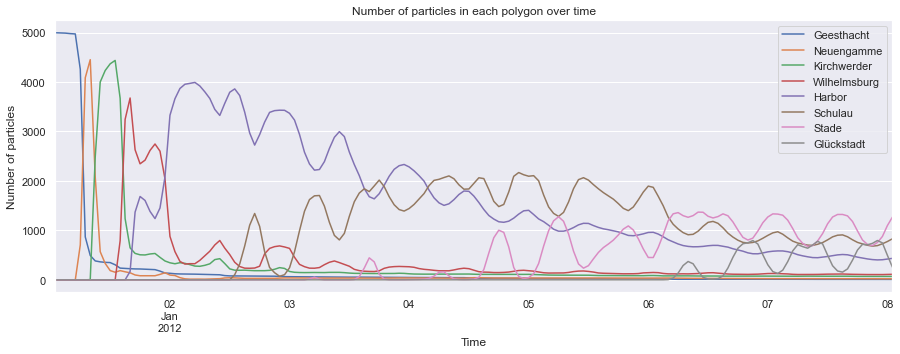

In [59]:
# plot
# plot each column as a line on the same plot over time
fig, ax = plt.subplots(figsize=(15, 5))
df.iloc[:,0:8].plot(ax=ax)

# plot sum of all columns as a line on the same plot over time
# df.sum(axis=1).plot(ax=ax, color='black', linewidth=3)

ax.set_ylabel('Number of particles')
ax.set_xlabel('Time')
ax.set_title('Number of particles in each polygon over time')

# set xlim to only show the first 7 days
ax.set_xlim([df.index[0], df.index[0] + pd.Timedelta(days=7)])



plt.show()

In [40]:
tracks = load_output_files.load_particle_track_vars('/scratch/local1/output/22_12_08_retention_v13/22_12_08_retention_v13_C001_caseInfo.json', var_list=['x','time','status'])

In [41]:
tracks.keys()

dict_keys(['dimensions', 'total_num_particles_released', 'status', 'time', 'dry_cell_index', 'x0', 'x', 'IDrelease_group', 'IDpulse', 'z', 'grid', 'particle_status_flags', 'particle_release_group_info', 'full_params', 'axis_lim'])

(368161.0, 368833.0)

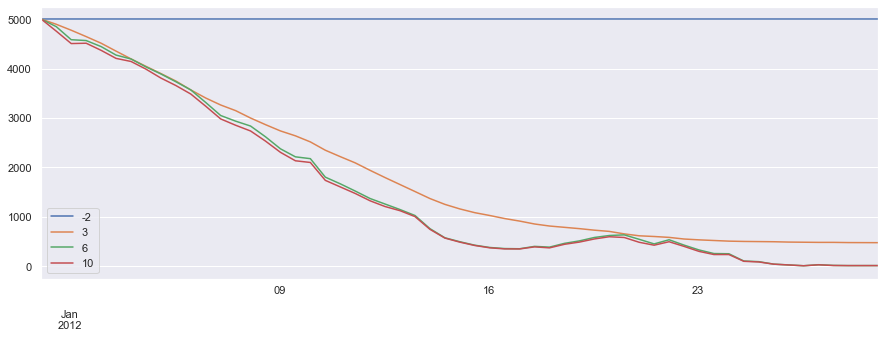

In [48]:
time = tracks['time']
status = tracks['status']
# get set of unique status values
status_values = np.unique(status)
# for each time step count the number of particles with a status greater or equal than 0
count = np.array([np.sum(status >= i, axis=1) for i in status_values])

#turn into a pandas dataframe
df = pd.DataFrame(count.T, index=time, columns=status_values)
# time as a datetime
df.index = pd.to_datetime(df.index, unit='s')

# plot
fig, ax = plt.subplots(figsize=(15, 5))
df.plot(ax=ax)
# the first 28 days
plt.xlim([df.index[0], df.index[0] + pd.Timedelta(days=28)])

array([[5000, 5000, 5000, ..., 5000, 5000, 5000],
       [5000, 4896, 4776, ...,  138,  138,  138],
       [5000, 4848, 4584, ...,    1,    3,   11],
       [5000, 4757, 4506, ...,    1,    3,   11]])

### retention success

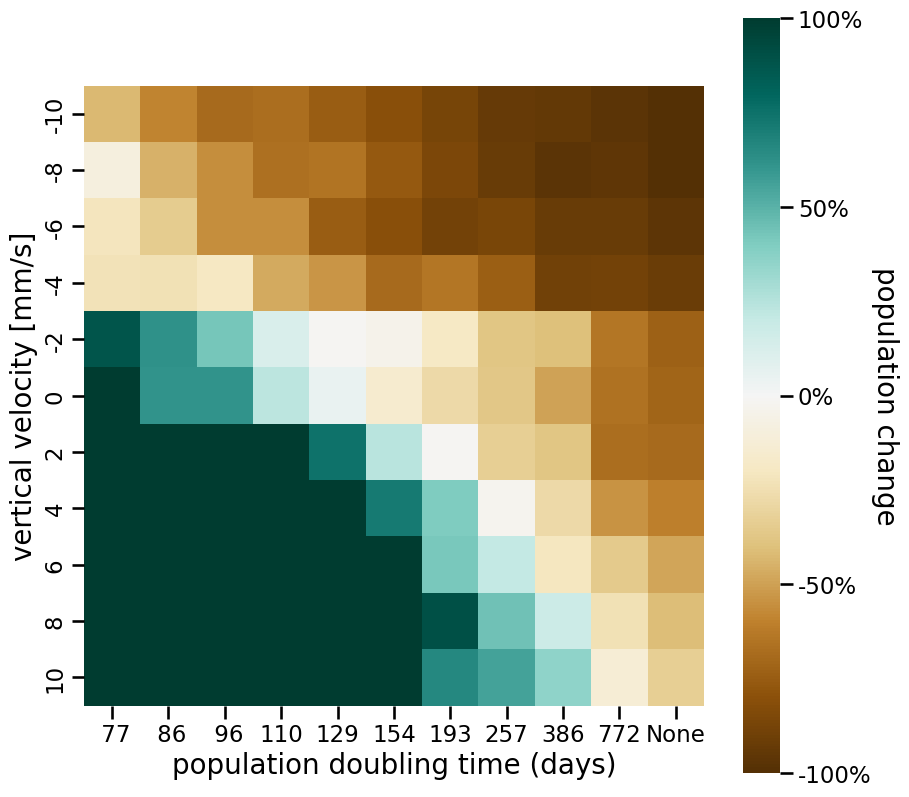

In [26]:
path = '/scratch/local1/output/22_12_08_retention_v13/retention_success_sa_mono.pkl'
with open(path, 'rb') as f:
    retention_success_sa = pickle.load(f)
    surviving, threshold, split_frac, vert_vel = retention_success_sa[0], retention_success_sa[1], retention_success_sa[2], retention_success_sa[3]


# Define your minimum and maximum based on your threshold
vmin = threshold - threshold 
vmax = threshold + threshold 

# Normalize the colormap
norm = TwoSlopeNorm(vmin=vmin, vcenter=threshold, vmax=vmax)

xtickslabels = []
for item in split_frac:
    if item != 0:
        xtickslabels.append('{:3.0f}'.format((1 / item) * (1 / 1440)) )
    else:
        xtickslabels.append('None')
      
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
heatmap = sns.heatmap(surviving,
                cmap='BrBG',
                norm=norm,
                xticklabels=xtickslabels,
                yticklabels=[int(item*1e3) for item in vert_vel],
                square=True
                )

# set xy labels
ax.set_xlabel('population doubling time (days)', fontsize=20)
ax.set_ylabel('vertical velocity [mm/s]', fontsize=20)


# Get the colorbar from the Heatmap
cbar = heatmap.collections[0].colorbar

# Get the original colorbar labels
original_labels = cbar.get_ticks()
new_labels = np.arange(vmin, vmax+threshold/2., threshold/2.)
cbar.set_ticks(new_labels)

# Calculate the new labels as percentages of the threshold
new_labels = [(label - threshold) / threshold * 100 for label in new_labels]
new_labels = ['{:.0f}%'.format(label) for label in new_labels]

# Set the new labels
# cbar.set_ticks(new_labels)
cbar.set_ticklabels(new_labels)

# Set the colorbar title
cbar.set_label('population change', rotation=270, labelpad=20, fontsize=20)

plt.show()


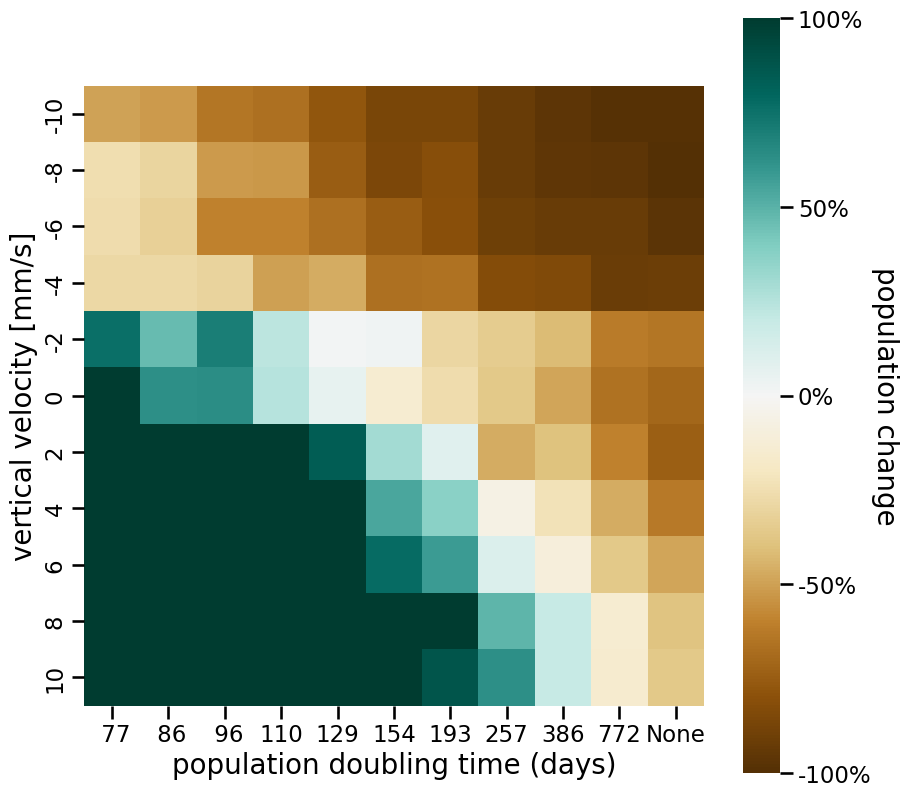

In [34]:
path = '/scratch/local1/output/22_12_08_retention_v13/retention_success_sa_diel.pkl'
with open(path, 'rb') as f:
    retention_success_sa = pickle.load(f)
    surviving, threshold, split_frac, vert_vel = retention_success_sa[0], retention_success_sa[1], retention_success_sa[2], retention_success_sa[3]


# Define your minimum and maximum based on your threshold
vmin = threshold - threshold 
vmax = threshold + threshold 

# Normalize the colormap
norm = TwoSlopeNorm(vmin=vmin, vcenter=threshold, vmax=vmax)

xtickslabels = []
for item in split_frac:
    if item != 0:
        xtickslabels.append('{:3.0f}'.format((1 / item) * (1 / 1440)) )
    else:
        xtickslabels.append('None')
      
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
heatmap = sns.heatmap(surviving,
                cmap='BrBG',
                norm=norm,
                xticklabels=xtickslabels,
                yticklabels=[int(item*1e3) for item in vert_vel],
                square=True
                )

# set xy labels
ax.set_xlabel('population doubling time (days)', fontsize=20)
ax.set_ylabel('vertical velocity [mm/s]', fontsize=20)


# Get the colorbar from the Heatmap
cbar = heatmap.collections[0].colorbar

# Get the original colorbar labels
original_labels = cbar.get_ticks()
new_labels = np.arange(vmin, vmax+threshold/2., threshold/2.)
cbar.set_ticks(new_labels)

# Calculate the new labels as percentages of the threshold
new_labels = [(label - threshold) / threshold * 100 for label in new_labels]
new_labels = ['{:.0f}%'.format(label) for label in new_labels]

# Set the new labels
# cbar.set_ticks(new_labels)
cbar.set_ticklabels(new_labels)

# Set the colorbar title
cbar.set_label('population change', rotation=270, labelpad=20, fontsize=20)

# plt.tight_layout()
plt.show()


In [ ]:
path = '/scratch/local1/output/22_12_08_retention_v13/dbf.pkl'
with open(path, 'rb') as f:
    dbf = pickle.load(f)
    short,long = dbf[0], dbf[1]

Text(0, 0.5, 'depth (m)')

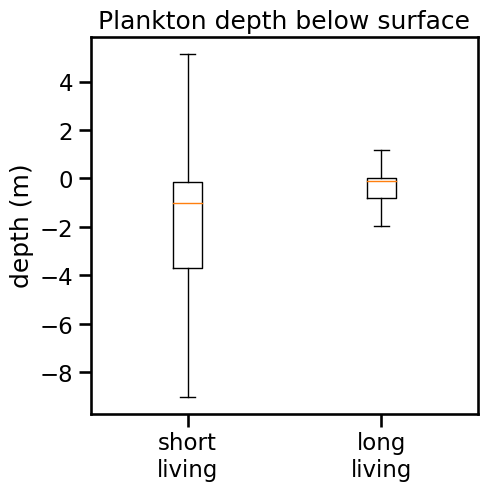

In [40]:
fig,ax = plt.subplots(figsize=(5,5),dpi=100)

ax.set_title('Plankton depth below surface')
ax.boxplot(short,positions=[1],labels=['short\nliving'],
                #whis=(0,100)
                showfliers=False
                )
ax.boxplot(long,positions=[2],labels=['long\nliving'],
                #whis=(0,100)
                showfliers=False
                )
ax.set_ylabel('depth (m)')

In [28]:
tracks = load_output_files.load_particle_track_vars('/scratch/local1/output/22_11_01_depth_losses_v08/22_11_01_depth_losses_v08R01_caseInfo.json', var_list=['age'])

In [29]:
x = tracks['x'][:,:,0].flatten()
# drop all nan values
x = x[~np.isnan(x)]

# same for y
y = tracks['x'][:,:,1].flatten()
y = y[~np.isnan(y)]

# same for age
age = tracks['age'].flatten()
age = age[~np.isnan(age)]
# transform age from seconds to days
age = age / (60*60*24)

# slite down to only 10000 particles
x = x[::100]
y = y[::100]
age = age[::100]


In [30]:

# Define the number of bins
num_bins = 200

# Create a 2D histogram with hexagonal bins
cmap = cm.get_cmap('viridis',36)  # choose the colormap you want to use

# Calculate the bin number and bin average age using binned_statistic_2d
binnumber, xedges, yedges, binnumbers = binned_statistic_2d(x, y, age, 'mean', bins=[num_bins,num_bins])


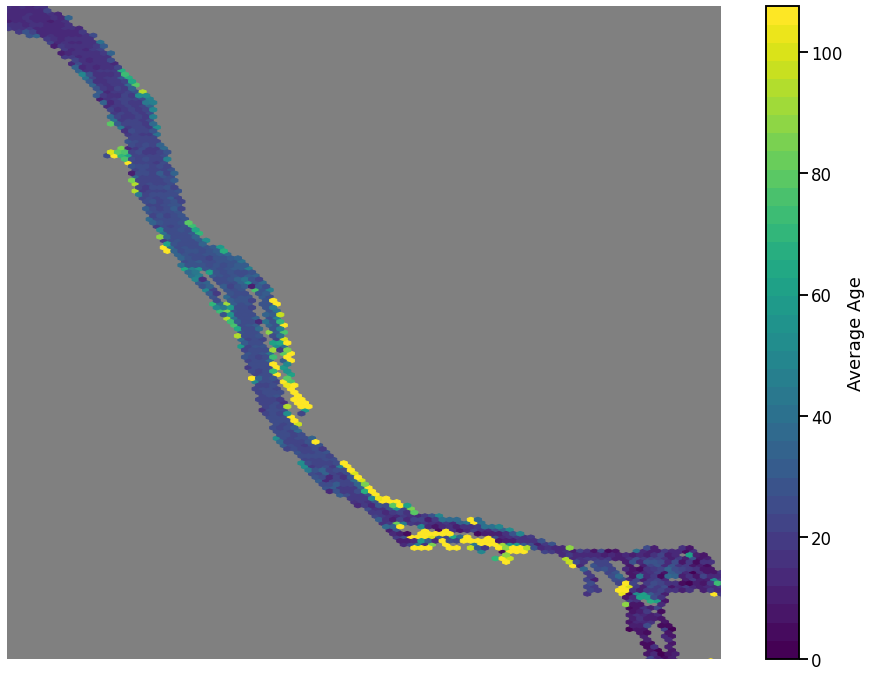

In [35]:
p90 = np.percentile(binnumber[np.isfinite(binnumber)], 95)

fig,ax = plt.subplots(figsize=(16,12))
# fig.set_facecolor('lightgreen')
ax.set_facecolor('gray')


# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove axis labels and ticks
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

hb = ax.hexbin(x, y, C=age, reduce_C_function=np.mean, gridsize=num_bins, cmap=cmap, vmin=0, vmax=p90)
cb = fig.colorbar(hb, ax=ax, label='Average Age')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_title('Hexbin plot colored by average age')

ax.set_xlim([5.15e5, 5.69e5])
ax.set_ylim([5.926e6, 5.97e6])

ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [18]:
import json
def load_polycounts_adhoc(cases, case_number):
    
    with open(cases[case_number]) as f:
        case_info = json.load(f)
        stats_file_names = case_info['output_files']['particle_statistics']
        stats_file_paths = [os.path.join(os.path.dirname(cases[case_number]), item) for item in stats_file_names]
        
    counts = []
    for item in stats_file_paths:
        print(item)
        with nc.Dataset(item) as df:
            print(df.variables.keys())
            counts.append(np.array(df.variables['count'])[:,0,:])



    return counts